In [7]:
import re
import pandas as pd
import numpy as np

C:\Users\mukul\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mukul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\mukul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
df=open('WhatsApp Chat with Mathematicians 21.txt','r',encoding='utf-8').read()

In [9]:
print(df)

20/03/22, 8:39 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
20/03/22, 7:58 pm - Harsh Agarwal(IIT Bombay) created group "Mathematician#2021🧐🧐"
20/03/22, 8:39 pm - Anish (Bs Mathematics) added you
20/03/22, 8:39 pm - Anish (Bs Mathematics): @919302893948 you're a fresher right?
20/03/22, 8:44 pm - Harsh Agarwal(IIT Bombay): Is sourav is fresher?
20/03/22, 8:45 pm - +91 79827 50218: I don't think so
20/03/22, 8:45 pm - +91 79827 50218: <Media omitted>
20/03/22, 8:47 pm - Aparna Agrawal(bs Mathematics): No
20/03/22, 8:52 pm - Harsh Agarwal(IIT Bombay) added +91 73056 69522
20/03/22, 9:17 pm - Shumail Malik(IITB Bs Maths): Yes..he's mukil
20/03/22, 9:17 pm - Shumail Malik(IITB Bs Maths): Mukul*
20/03/22, 9:17 pm - Shumail Malik(IITB Bs Maths): Fresher at campus
20/03/22, 9:47 pm - Harsh Agarwal(IIT Bombay): .reminder
20/03/22, 9:53 pm - +91 78387 97366: timetable banaya kisi ne to share kard

In [10]:
pattern='\d{1,2}\/\d{1,2}\/\d{1,2}\,\s\d{1,2}\:\d{1,2}\s\w\w\s\-\s'

In [11]:
messeges=re.split(pattern,df)[1:]
#messeges=re.split('\n',messeges)[0]

In [12]:
dates=re.findall('\d{1,2}\/\d{1,2}\/\d{1,2}\,\s\d{1,2}\:\d{1,2}\s\w\w',df)

In [13]:
data=pd.DataFrame({'user_messege':messeges,'date':dates})

In [14]:
df=data.copy()

In [15]:
df['date']=pd.to_datetime(df['date'])

In [16]:
df['user_messege']=df['user_messege'].str.split(':')

In [17]:
def user(x):
    if len(x)<2:
        return 'Group notification'
    else:
        return x[0]

In [18]:
df['messege']=df['user_messege'].apply(lambda x:x[-1])

In [19]:
df['user']=df['user_messege'].apply(lambda x:user(x))

In [20]:
df=df.drop(columns=['user_messege'])

In [21]:
df['year']=df['date'].dt.year

In [22]:
df['month']=df['date'].dt.month_name()

In [23]:
df['hours']=df['date'].dt.hour

In [24]:
df['minute']=df['date'].dt.minute

In [25]:
df['messege']=df['messege'].apply(lambda x:re.split('\n',x)[0])

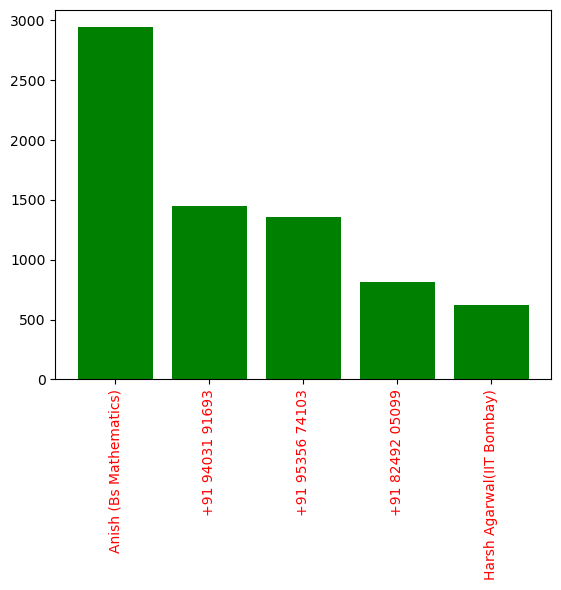

In [26]:
import matplotlib.pyplot as plt


A=df['user'].value_counts().head()

x=A.index

y=A.values

plt.bar(x,y,color='green')
plt.xticks(rotation='vertical',color='red')
plt.show()

In [27]:
round((df['user'].value_counts()/len(df))*100,2).reset_index().rename(columns={'index':'name','user':'percent(%)'})

,name,percent(%)
0,Anish (Bs Mathematics),28.95
1,+91 94031 91693,14.28
2,+91 95356 74103,13.39
3,+91 82492 05099,8.05
4,Harsh Agarwal(IIT Bombay),6.10
5,Shumail Malik(IITB Bs Maths),5.86
6,Aparna Agrawal(bs Mathematics),5.61
7,+91 79827 50218,4.94
8,+91 86607 75020,2.66
9,Ayan(Bs Mathematics),2.00


In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [29]:
from wordcloud import WordCloud

In [30]:
import emoji
emojis=pd.DataFrame(emoji.EMOJI_DATA)



In [31]:
emojis_list=np.transpose(emojis).index

In [32]:
new_df=df[(df['user']!='Group notification')]# | (df['messege']!=' <Media omitted>')]

new_df=new_df[df['messege']!=' <Media omitted>']
    

def word(x):
    x=x.lower()
    x=word_tokenize(x)
    y=[]
    emoj=[]
    for i in x:
        if i not in stopwords.words('english'):
            i=PorterStemmer().stem(i)
                
            y.append(i)
    return ' '.join(y)
    

new_df['messege']=new_df['messege'].apply(word)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(new_df['messege'].str.cat(sep=' '))

C:\Users\mukul\AppData\Local\Temp\ipykernel_21180\2162263087.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df=new_df[df['messege']!=' <Media omitted>']


In [33]:
from collections import Counter

In [34]:

y=[]
for i in new_df['messege']:
    if i in emojis_list:
        y.extend(i)

In [35]:
emoji_df=pd.DataFrame(Counter(y).most_common())

In [36]:
emoji_df=emoji_df.rename(columns={0:"emoji",1:"used_time"})

In [37]:
emoji_df

,emoji,used_time
0,😂,53
1,️,18
2,👀,15
3,‍,13
4,🤔,13
...,...,...
72,✌,1
73,😢,1
74,🔭,1
75,😱,1


In [38]:
from collections import Counter

In [39]:
 def token(x):
    y=[]
    for i in x['messege']:
        y.extend(word_tokenize(i))
    return y
A=pd.DataFrame(Counter(token(new_df)).most_common(20),)
A
#token(new_df)

,0,1
0,?,1350
1,",",706
2,n't,519
3,'s,412
4,@,341
5,.,337
6,class,266
7,!,248
8,cours,236
9,messag,211


In [40]:
A.rename(columns={0:'word',1:"count"},inplace = True)

In [41]:
df['dates']=df['date'].dt.date

In [42]:
df['month_num']=df['date'].dt.month

In [43]:
time_df=pd.DataFrame(df.groupby(['year','month','month_num','dates']).count()['messege'].reset_index())

time_df=time_df.sort_values('dates')

year=time_df.groupby('year').sum()['messege']


month_df=time_df[time_df['year']==2022]


In [44]:
time_df['dates']=pd.to_datetime(time_df['dates'])

time_df['day']=time_df['dates'].dt.day_name()

In [45]:
month_df=month_df.groupby(['month','month_num']).sum()['messege'].reset_index().sort_values('month_num')

In [46]:
month_df

,month,month_num,messege
4,January,1,479
3,February,2,259
7,March,3,1479
0,April,4,1633
8,May,5,780
6,June,6,327
5,July,7,1911
1,August,8,718
11,September,9,528
10,October,10,661


In [47]:
time_df

,year,month,month_num,dates,messege,day
78,2022,January,1,2022-01-04,80,Tuesday
79,2022,January,1,2022-01-05,71,Wednesday
80,2022,January,1,2022-01-06,7,Thursday
81,2022,January,1,2022-01-07,1,Friday
82,2022,January,1,2022-01-08,40,Saturday
...,...,...,...,...,...,...
68,2022,December,12,2022-12-29,8,Thursday
69,2022,December,12,2022-12-30,5,Friday
70,2022,December,12,2022-12-31,1,Saturday
242,2023,January,1,2023-01-01,37,Sunday


In [48]:
day_df=time_df.groupby(['month','month_num','day']).sum()['messege'].reset_index().sort_values('month_num')

In [49]:
day_df

,month,month_num,day,messege
32,January,1,Wednesday,291
31,January,1,Tuesday,89
30,January,1,Thursday,7
29,January,1,Sunday,88
28,January,1,Saturday,40
...,...,...,...,...
17,December,12,Sunday,100
18,December,12,Thursday,59
19,December,12,Tuesday,31
20,December,12,Wednesday,43


In [50]:
time_df.groupby('day').sum()['messege']

day
Friday       1529
Monday       2467
Saturday      686
Sunday       1140
Thursday     1138
Tuesday      1131
Wednesday    2061
Name: messege, dtype: int64

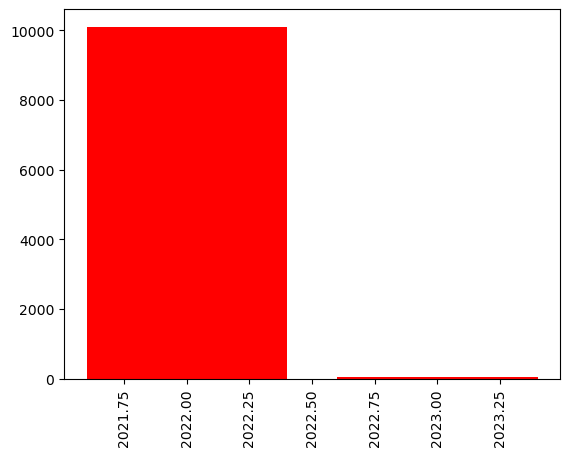

In [51]:
plt.bar(df['year'].value_counts().index,df['year'].value_counts().values,color='red')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
new_df

,date,messege,user,year,month,hours,minute
3,2022-03-20 20:39:00,@ 919302893948 're fresher right ?,Anish (Bs Mathematics),2022,March,20,39
4,2022-03-20 20:44:00,sourav fresher ?,Harsh Agarwal(IIT Bombay),2022,March,20,44
5,2022-03-20 20:45:00,n't think,+91 79827 50218,2022,March,20,45
7,2022-03-20 20:47:00,,Aparna Agrawal(bs Mathematics),2022,March,20,47
9,2022-03-20 21:17:00,ye .. 's mukil,Shumail Malik(IITB Bs Maths),2022,March,21,17
...,...,...,...,...,...,...,...
10147,2023-02-01 17:19:00,la202,Anish (Bs Mathematics),2023,February,17,19
10148,2023-02-01 17:53:00,wtf,+91 95356 74103,2023,February,17,53
10149,2023-02-01 18:00:00,🤣🤣,Anish (Bs Mathematics),2023,February,18,0
10150,2023-02-01 18:00:00,null,Anish (Bs Mathematics),2023,February,18,0


In [53]:
df['year'].value_counts().values

array([10101,    51], dtype=int64)

In [54]:
pd.DataFrame(df.groupby(['year','month','date']).count()['messege'].reset_index())

,year,month,date,messege
0,2022,April,2022-04-04 11:17:00,2
1,2022,April,2022-04-04 11:47:00,2
2,2022,April,2022-04-04 11:49:00,1
3,2022,April,2022-04-04 11:50:00,1
4,2022,April,2022-04-04 12:21:00,1
...,...,...,...,...
4447,2023,January,2023-01-01 19:26:00,1
4448,2023,January,2023-01-01 21:02:00,2
4449,2023,January,2023-01-01 21:03:00,1
4450,2023,January,2023-01-01 21:05:00,1


In [57]:
from textblob import TextBlob

In [58]:
df['sentiment']=df['messege'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [61]:
a=df['sentiment'].mean()

In [69]:
if (-1<a<=-0.5):
    b='negitive'
elif ((-0.5)<a<(-0.1)):
    b='slightly negative'
elif (-0.1<a<0.1):
    b='neutral'
elif (0.1<=a<0.5):
    b='slightly positive'   
else :
    b='positive'

In [70]:
b

'neutral'

In [71]:
df

,date,messege,user,year,month,hours,minute,dates,month_num,sentiment
0,2022-03-20 20:39:00,Messages and calls are end-to-end encrypted. N...,Group notification,2022,March,20,39,2022-03-20,3,0.250000
1,2022-03-20 19:58:00,"Harsh Agarwal(IIT Bombay) created group ""Mathe...",Group notification,2022,March,19,58,2022-03-20,3,-0.200000
2,2022-03-20 20:39:00,Anish (Bs Mathematics) added you,Group notification,2022,March,20,39,2022-03-20,3,0.000000
3,2022-03-20 20:39:00,@919302893948 you're a fresher right?,Anish (Bs Mathematics),2022,March,20,39,2022-03-20,3,0.285714
4,2022-03-20 20:44:00,Is sourav is fresher?,Harsh Agarwal(IIT Bombay),2022,March,20,44,2022-03-20,3,0.000000
...,...,...,...,...,...,...,...,...,...,...
10147,2023-02-01 17:19:00,LA202,Anish (Bs Mathematics),2023,February,17,19,2023-02-01,2,0.000000
10148,2023-02-01 17:53:00,WTF,+91 95356 74103,2023,February,17,53,2023-02-01,2,-0.500000
10149,2023-02-01 18:00:00,🤣🤣,Anish (Bs Mathematics),2023,February,18,0,2023-02-01,2,0.000000
10150,2023-02-01 18:00:00,null,Anish (Bs Mathematics),2023,February,18,0,2023-02-01,2,0.000000
